# Übungsaufgaben 4




## Aufgabe 1 (Frequenzliste mit pandas)

### Aufgabe 1a
Berechnen Sie für folgende Tokenliste die Frequenzliste mit pandas, indem Sie die Liste in eine pandas-Series umwandeln:

In [1]:
text = ['Call', 'me', 'Ishmael', '.', 'Call', 'me', 'Ahab', '.', 'Call', 'him', 'Ahab', '.']

In [2]:
import pandas as pd
pd.Series(text).value_counts()

.          3
Call       3
Ahab       2
me         2
Ishmael    1
him        1
dtype: int64

#### Efficiency Test:

In [3]:
from nltk.tokenize import word_tokenize
raw_wahlverw = open('wahlverwandschaften.txt').read().lower()
wahlverw = word_tokenize(raw_wahlverw)
wahlverw[0:9]

['die',
 'wahlverwandtschaften',
 'ein',
 'roman',
 'von',
 'johann',
 'wolfgang',
 'von',
 'goethe']

In [4]:
def countwords_pandas(text):
    counts = pd.Series(text).value_counts()
    return counts

In [5]:
import timeit, functools
t = timeit.Timer(functools.partial(countwords_pandas, wahlverw))
print(t.timeit(5))

0.023810106999007985


### Aufgabe 1b
Wandeln Sie folgendes Mini-Satzkorpus in ein pandas-Dataframe mit Spalte `texts` um und zählen Sie anschließend die Tokens, indem Sie die String-Methode `str.split()` auf diese Spalte anwenden:

In [6]:
corpus = ['Call me Ishmael .', 'Call me Ahab.', 'Call him Ahab.']

In [7]:
df = pd.DataFrame(corpus)
df.columns = ['texts']
df

,texts
0,Call me Ishmael .
1,Call me Ahab.
2,Call him Ahab.


In [8]:
df['texts'].str.split()

0    [Call, me, Ishmael, .]
1         [Call, me, Ahab.]
2        [Call, him, Ahab.]
Name: texts, dtype: object

In [9]:
df['texts_split'] = df['texts'].str.split()
df

,texts,texts_split
0,Call me Ishmael .,"[Call, me, Ishmael, .]"
1,Call me Ahab.,"[Call, me, Ahab.]"
2,Call him Ahab.,"[Call, him, Ahab.]"


In [10]:
df_tokens = df.explode('texts_split')
df_tokens.head()

,texts,texts_split
0,Call me Ishmael .,Call
0,Call me Ishmael .,me
0,Call me Ishmael .,Ishmael
0,Call me Ishmael .,.
1,Call me Ahab.,Call


In [11]:
df_tokens['texts_split'].value_counts()

Call       3
Ahab.      2
me         2
Ishmael    1
him        1
.          1
Name: texts_split, dtype: int64

---

In [12]:
#alternativ (wenn Dataframe gegeben, umwandeln in Liste und weiterverarbeiten):
list(df['texts'])

['Call me Ishmael .', 'Call me Ahab.', 'Call him Ahab.']

In [13]:
list_texts = [w for s in list(df['texts']) for w in s.split()]
list_texts

['Call', 'me', 'Ishmael', '.', 'Call', 'me', 'Ahab.', 'Call', 'him', 'Ahab.']

In [14]:
from collections import Counter
Counter(list_texts)

Counter({'.': 1, 'Ahab.': 2, 'Call': 3, 'Ishmael': 1, 'him': 1, 'me': 2})

## Aufgabe 2 (Textverarbeitung mit pandas)

Lesen Sie den Wahlverwandschaften-Text zeilenweise in ein pandas-Dataframe ein und führen Sie anschließend untenstehende Korpusanalysen aus. 

### Aufgabe 2a 
Tokenisieren Sie den Text und erstellen Sie eine Frequenzliste.

In [15]:
import pandas as pd

In [16]:
#Text zeilenweise in DataFrame einlesen
df = pd.read_csv('wahlverwandschaften.txt', sep = "\n", header=None) 
df.columns = ['lines']
df.head()

,lines
0,Die Wahlverwandtschaften
1,Ein Roman
2,von Johann Wolfgang von Goethe
3,Erster Teil
4,Erstes Kapitel


In [17]:
words = [w for l in list(df['lines']) for w in l.lower().split()]
words[0:10]

['die',
 'wahlverwandtschaften',
 'ein',
 'roman',
 'von',
 'johann',
 'wolfgang',
 'von',
 'goethe',
 'erster']

In [18]:
pd.Series(words).value_counts()

und             330
die             253
der             181
zu              180
sie             156
               ... 
gerecht           1
behaupten,        1
ahnungsvoll,      1
minder            1
aufgeklärt,       1
Length: 3850, dtype: int64

### Aufgabe 2b

Erstellen Sie eine Stopwort-gefilterte Frequenzliste.

In [19]:
from nltk.corpus import stopwords
stop = stopwords.words('german')
stop[0:10]

['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an']

In [20]:
words = [w for l in list(df['lines']) for w in l.lower().split() if w not in stop]
words[0:10]

['wahlverwandtschaften',
 'roman',
 'johann',
 'wolfgang',
 'goethe',
 'erster',
 'teil',
 'erstes',
 'kapitel',
 'eduard—so']

In [21]:
pd.Series(words).value_counts()

sagte          37
versetzte      36
eduard         34
charlotte,     30
immer          23
               ..
allerdings      1
freundlich,     1
„bald           1
sein?“          1
aufgeklärt,     1
Length: 3652, dtype: int64

### Aufgabe 2c
Berechnen Sie die durchschnittliche Zeilen- und Wortlänge.

In [22]:
#Beispiel-Daten:
corpus = ['a a', 'aa', 'a']
df_test = pd.DataFrame(corpus)
df_test.columns = ['lines']

In [23]:
#Zeilenlänge in Wörtern:
print("average word count per line/row: ", df_test['lines'].str.split().apply(len).mean())

average word count per line/row:  1.3333333333333333


In [24]:
#Wortlänge in Zeichen:

In [25]:
df_test_words = df_test['lines'].str.split()
df_test_words

0    [a, a]
1      [aa]
2       [a]
Name: lines, dtype: object

In [26]:
df_test_tokens = df_test_words.explode()
df_test_tokens.head()

0     a
0     a
1    aa
2     a
Name: lines, dtype: object

In [27]:
print("average character count per word: ", df_test_tokens.str.len().mean())

average character count per word:  1.25


#### für Wahlverwandschaften:

In [28]:
#Zeilenlänge in Wörtern:
print("average word count per line/row: ", df['lines'].str.split().apply(len).mean())

average word count per line/row:  9.820603907637656


In [29]:
#Wortlänge in Zeichen:
df_words = df['lines'].str.split()
print("average character count per word: ", df_words.explode().str.len().mean())

average character count per word:  5.523331524688008


## Aufgabe 3 (Bigramme mit pandas und NLTK)

Berechnen Sie auf dem Wahlverwandschaften-Text eine Stopwort-gefilterte Bigramm-Frequenzliste mit pandas-Dataframe und NLTK ngrams.

In [30]:
import pandas as pd
df = pd.read_csv('wahlverwandschaften.txt', sep = "\n", header=None) 
df.columns = ['lines']
df.head()

,lines
0,Die Wahlverwandtschaften
1,Ein Roman
2,von Johann Wolfgang von Goethe
3,Erster Teil
4,Erstes Kapitel


In [31]:
len(df)

1126

In [32]:
from nltk.corpus import stopwords
stop = stopwords.words('german')
stop[0:10]

['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an']

In [33]:
from nltk import ngrams

In [34]:
bigrams = [ngram for l in list(df['lines']) for ngram in ngrams(l.lower().split(), 2) if not any(word in ngram for word in stop)]
bigrams[0:10]

[('johann', 'wolfgang'),
 ('erster', 'teil'),
 ('erstes', 'kapitel'),
 ('eduard—so', 'nennen'),
 ('reichen', 'baron'),
 ('besten', 'mannesalter—eduard'),
 ('schönste', 'stunde'),
 ('frisch', 'erhaltene'),
 ('erhaltene', 'pfropfreiser'),
 ('junge', 'stämme')]

In [35]:
pd.Series(bigrams).value_counts()

(versetzte, charlotte,)         11
(sagte, charlotte,)             11
(sagte, eduard,)                 6
(versetzte, eduard,)             5
(versetzte, charlotte.)          4
                                ..
(mauer, aufgerichtet,)           1
(mitteln, bestanden,)            1
(berühmter, arzt;)               1
(freundschaftlichen, bitten)     1
(eduard, gewendet,)              1
Length: 2351, dtype: int64

In [36]:
#alternativ: mit Counter
from collections import Counter
Counter(bigrams).most_common(10)

[(('versetzte', 'charlotte,'), 11),
 (('sagte', 'charlotte,'), 11),
 (('sagte', 'eduard,'), 6),
 (('versetzte', 'eduard,'), 5),
 (('versetzte', 'charlotte.'), 4),
 (('versetzte', 'eduard;'), 3),
 (('charlotte,', '„und'), 3),
 (('sagte', 'eduard'), 3),
 (('recht', 'schön'), 2),
 (('„ganz', 'recht“,'), 2)]

## Aufgabe 4 (UD-Korpusanalyse mit pandas)

Lesen Sie das UD-Korpus https://raw.githubusercontent.com/proiel/proiel-treebank/master/latin-nt.conll in ein pandas-Dataframe ein und führen Sie dieselben Korpusanalysen wie in obigen Aufgaben aus. Visualisieren Sie auch die Ergebnisse.


In [37]:
import pandas as pd
df = pd.read_csv('../../texte_corpora/latin-nt.conll.txt', sep = "\t", header=None) 
df.columns = ['nr','token','lemma','pos','pos2','feat','head','rel','8','9']
df.head()

,nr,token,lemma,pos,pos2,feat,head,rel,8,9
0,1,liber,liber,N,Nb,NUMBs|GENDm|CASEn,0,xobj(9)pred,_,_
1,2,generationis,generatio,N,Nb,NUMBs|GENDf|CASEg,1,atr,_,_
2,3,Iesu,Iesus,N,Ne,NUMBs|GENDm|CASEg,2,atr,_,_
3,4,Christi,Christus,N,Ne,NUMBs|GENDm|CASEg,3,apos,_,_
4,5,filii,filius,N,Nb,NUMBs|GENDm|CASEg,3,apos,_,_


#### Frequenzliste:

In [38]:
df['token'].value_counts()

et             8489
in             3784
autem          1935
est            1853
non            1697
               ... 
caedens           1
turbemini         1
secedebat         1
praestabant       1
pascentium        1
Name: token, Length: 13996, dtype: int64

#### gefilterte Frequenzlisten:

In [39]:
# Lemma-Frequenzliste, gefiltert nach Content-Word-POS-Tags:
df[df['pos'].isin(['N','V','A','D'])]['lemma'].value_counts()

sum          4620
dico         2079
autem        1935
non          1697
deus         1087
             ... 
polliceor       1
premo           1
oblivio         1
Cleopas         1
Porcius         1
Name: lemma, Length: 4325, dtype: int64

In [40]:
# Lemma-Frequenzliste von Substantiven:
df[df['pos'] == 'N']['lemma'].value_counts()

deus          1087
Iesus          857
dominus        631
homo           512
Christus       429
              ... 
creator          1
subtilitas       1
par              1
Sychar           1
Sergius          1
Name: lemma, Length: 2151, dtype: int64

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
df_N_lemma_head = df[df['pos'] == 'N']['lemma'].value_counts().head(20)

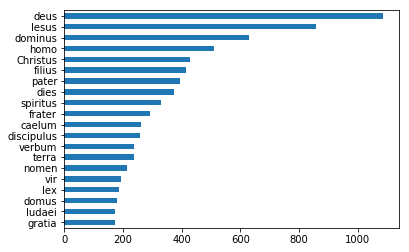

In [43]:
df_N_lemma_head.sort_values().plot(kind = 'barh')

#### Bigramme:

In [44]:
#ausgehend von Tokenliste
print(list(df['token'])[0:10])

['liber', 'generationis', 'Iesu', 'Christi', 'filii', 'David', 'filii', 'Abraham', 'Abraham', 'genuit']


In [45]:
#mit zip:
bigrams = zip(list(df['token'])[:-1], list(df['token'])[1:])
print(list(bigrams)[0:10])

[('liber', 'generationis'), ('generationis', 'Iesu'), ('Iesu', 'Christi'), ('Christi', 'filii'), ('filii', 'David'), ('David', 'filii'), ('filii', 'Abraham'), ('Abraham', 'Abraham'), ('Abraham', 'genuit'), ('genuit', 'Isaac')]


In [46]:
#mit NLTK:
from nltk import ngrams
bigrams = ngrams(list(df['token']), 2)
print(list(bigrams)[0:10])

[('liber', 'generationis'), ('generationis', 'Iesu'), ('Iesu', 'Christi'), ('Christi', 'filii'), ('filii', 'David'), ('David', 'filii'), ('filii', 'Abraham'), ('Abraham', 'Abraham'), ('Abraham', 'genuit'), ('genuit', 'Isaac')]


#### Durchschnittliche Wortlänge:

In [47]:
print("average character count per word: ", df['token'].str.len().mean())

average character count per word:  5.239704262733133


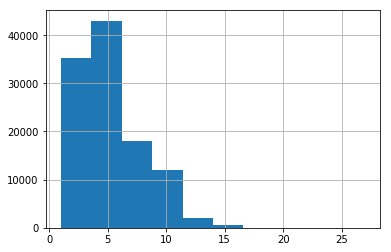

In [48]:
df['token'].str.len().hist()

#### Durchschnittliche Satzlänge:

In [49]:
#Satzindex hinzufügen:
df['sentnr'] = 0
df.head(2)

,nr,token,lemma,pos,pos2,feat,head,rel,8,9,sentnr
0,1,liber,liber,N,Nb,NUMBs|GENDm|CASEn,0,xobj(9)pred,_,_,0
1,2,generationis,generatio,N,Nb,NUMBs|GENDf|CASEg,1,atr,_,_,0


In [50]:
sent_nr = 0
for index, row in df.iterrows():
    if row['nr'] == 1:
        sent_nr += 1
    df.at[index, 'sentnr'] = sent_nr

df.head(15)

,nr,token,lemma,pos,pos2,feat,head,rel,8,9,sentnr
0,1,liber,liber,N,Nb,NUMBs|GENDm|CASEn,0,xobj(9)pred,_,_,1
1,2,generationis,generatio,N,Nb,NUMBs|GENDf|CASEg,1,atr,_,_,1
2,3,Iesu,Iesus,N,Ne,NUMBs|GENDm|CASEg,2,atr,_,_,1
3,4,Christi,Christus,N,Ne,NUMBs|GENDm|CASEg,3,apos,_,_,1
4,5,filii,filius,N,Nb,NUMBs|GENDm|CASEg,3,apos,_,_,1
5,6,David,David,N,Ne,INFLn,5,atr,_,_,1
6,7,filii,filius,N,Nb,NUMBs|GENDm|CASEg,5,apos,_,_,1
7,8,Abraham,Abraham,N,Ne,INFLn,7,atr,_,_,1
8,1,Abraham,Abraham,N,Ne,INFLn,2,sub,_,_,2
9,2,genuit,gigno,V,V-,PERS3|NUMBs|TENSr|MOODi|VOICa,0,pred,_,_,2


In [51]:
words_per_sent = df.groupby(['sentnr'], sort=False)['nr'].max()
words_per_sent

sentnr
1        8
2        3
3        4
4        7
5        8
        ..
11847    5
11848    3
11849    1
11850    3
11851    7
Name: nr, Length: 11851, dtype: int64

In [52]:
print("average word count per sentence: ", words_per_sent.mean())

average word count per sentence:  9.347228082018395


#### alternativ: count words 

In [53]:
#alternativ: count words (wenn keine nr-Daten gegeben)
words_per_sent_count = df.groupby(['sentnr'], sort=False).size()
words_per_sent_count

sentnr
1        8
2        3
3        4
4        7
5        8
        ..
11847    5
11848    3
11849    1
11850    3
11851    7
Length: 11851, dtype: int64

In [54]:
print("average word count per sentence: ", words_per_sent_count.mean())

average word count per sentence:  9.347228082018395


#### Plotting

In [55]:
words_per_sent.sort_values(ascending=False)

sentnr
3445     237
10739     91
11656     82
10564     76
10688     75
        ... 
6618       1
867        1
2962       1
1796       1
3578       1
Name: nr, Length: 11851, dtype: int64

In [56]:
df[df['sentnr'] == 3445].token.str.cat(sep=' ')

'et ipse Iesus erat incipiens quasi annorum triginta ut putabatur filius Ioseph qui fuit Heli qui fuit Matthat qui fuit Levi qui fuit Melchi qui fuit Iannae qui fuit Ioseph qui fuit Matthathiae qui fuit Amos qui fuit Naum qui fuit Esli qui fuit Naggae qui fuit Maath qui fuit Matthathiae qui fuit Semei qui fuit Iosech qui fuit Ioda qui fuit Iohanna qui fuit Resa qui fuit Zorobabel qui fuit Salathihel qui fuit Neri qui fuit Melchi qui fuit Addi qui fuit Cosam qui fuit Helmadam qui fuit Her qui fuit Iesu qui fuit Eliezer qui fuit Iorim qui fuit Matthat qui fuit Levi qui fuit Symeon qui fuit Iuda qui fuit Ioseph qui fuit Iona qui fuit Eliachim qui fuit Melea qui fuit Menna qui fuit Matthata qui fuit Nathan qui fuit David qui fuit Iesse qui fuit Obed qui fuit Booz qui fuit Salmon qui fuit Naasson qui fuit Aminadab qui fuit Aram qui fuit Esrom qui fuit Phares qui fuit Iudae qui fuit Iacob qui fuit Isaac qui fuit Abraham qui fuit Thare qui fuit Nachor qui fuit Seruch qui fuit Ragau qui fuit P

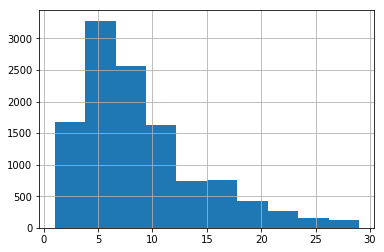

In [57]:
words_per_sent.where(words_per_sent  < 30).hist()